In [10]:
import qtm.qcompilation
import numpy as np
import types
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
qtm.constant.learning_rate

0.1

In [21]:
num_qubits = 3
num_layers = 1
thetas = np.ones(num_qubits*num_layers*5)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_linear_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_basic',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 10, verbose = 1)

Step:   0%|          | 0/10 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 10/10 [01:07<00:00,  6.71s/it]


In [17]:
compiler.thetas

array([0.68601194, 0.62765442, 1.9323779 , 1.87620056, 1.28241687,
       1.72569132, 1.05436389, 1.40033893, 1.83171127, 1.79631687,
       0.83498644, 0.97277576, 0.3633133 , 0.39529137, 0.55196283,
       0.49591972, 0.60779068, 0.44574213, 0.35578804, 0.36614676])

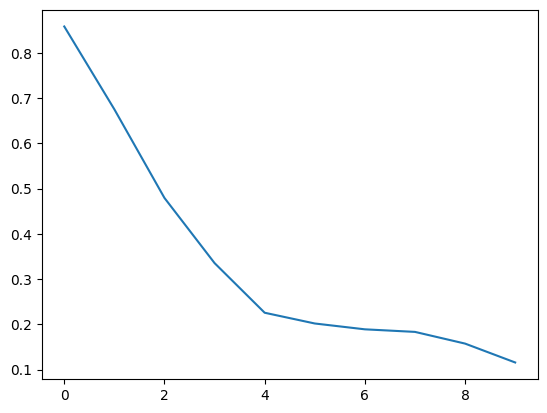

In [22]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

In [12]:
num_qubits = 3
num_layers = 2
n_walltoall = qtm.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers* 3 * num_qubits + num_layers*n_walltoall)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.state.create_haar_state(num_qubits),
    vdagger = qtm.ansatz.create_Walltoall_layerd_ansatz,
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 10, verbose = 1)


Step:   0%|          | 0/10 [01:45<?, ?it/s]










Step: 100%|██████████| 10/10 [01:49<00:00, 10.93s/it]


In [15]:
import numpy as np
import qiskit
qc = qiskit.QuantumCircuit(5)
vector = 1/(2*np.sqrt(2))*np.asarray([
    1, 0, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, -1,
    0, 0, 0, 0, 0, -1, 1, 0,
    0, 1, 1, 0, 0, 0, 0, 0,    
])
qc.initialize(vector)
transipled_qc = qiskit.compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
transipled_qc.draw(output='mpl')

psi = qiskit.quantum_info.Statevector(qc)
print(np.around(psi, 2))

[ 0.35+0.j -0.  +0.j -0.  +0.j  0.35+0.j -0.  -0.j  0.  +0.j  0.  +0.j
 -0.  +0.j  0.  -0.j  0.  -0.j  0.  -0.j -0.  +0.j  0.35+0.j  0.  -0.j
 -0.  -0.j -0.35+0.j  0.  +0.j -0.  +0.j  0.  -0.j  0.  +0.j -0.  -0.j
 -0.35+0.j  0.35+0.j  0.  +0.j -0.  +0.j  0.35+0.j  0.35+0.j -0.  +0.j
  0.  -0.j -0.  -0.j  0.  +0.j  0.  +0.j]


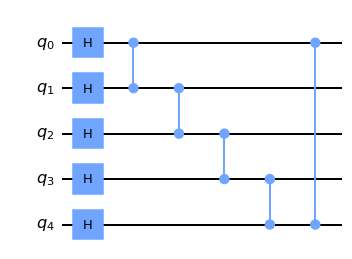

In [12]:
import qtm.ansatz
qc1 = qiskit.QuantumCircuit(5)
for i in range(0, 5):
    qc1.h(i)
for i in range(0, 5):
    if i == 4:
        qc1.cz(i, 0)
    else: 
        qc1.cz(i, i + 1)
qc1.draw('mpl')


In [14]:
print(qiskit.quantum_info.Statevector(qc1))

Statevector([ 0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
